# **Classification And Prediction Of Product Attributes For Etsy Marketplace Using Machine Learning Algorithms**

---
The project aims learn and predict attribute patterns for Etsy Marketplace.
Here is the structure for this notebook:


1.   Exploratory Data Analysis
2.   Pre-processing Training Data
3.   Model Training 
4.   Evaluation
5.   Model saved at local system
6.   Pre-processing Testing Data
7.   Submission



In [ ]:
# libraries
import io
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report
from joblib import dump
from joblib import load

# Matplotlib configuration
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

In [ ]:
# set random seed
np.random.seed(seed=42)

# **Exploratory Data Analysis**

---

Performing a few basic operations to obtain unique products from training and testing data, locating columns in training and testing data, displaying the columns, obtaining unique values from a few columns, and determining the percentage of missing data in all columns from the dataset.









In [ ]:
PATH = "/Users/virus/Desktop/data"

In [ ]:
!ls {PATH}

multinomialNB.joblib parquet              tfrecords


In [ ]:
parquet_filenames_train = !ls -1 {PATH}/parquet/train

In [ ]:
parquet_filenames_train[:5]

['part-00000-of-00278.parquet',
 'part-00001-of-00278.parquet',
 'part-00002-of-00278.parquet',
 'part-00003-of-00278.parquet',
 'part-00004-of-00278.parquet']

In [ ]:
parquet_filenames_test = !ls -1 {PATH}/parquet/test

In [ ]:
parquet_filenames_test[:5]

['part-00000-of-00278.parquet',
 'part-00001-of-00278.parquet',
 'part-00002-of-00278.parquet',
 'part-00003-of-00278.parquet',
 'part-00004-of-00278.parquet']

In [ ]:
def get_parquet_data(folder, N):
    """ Read parquet data from mutiple files """

    filenames = [ 
        f"{PATH}/parquet/{folder}/part-{i:05d}-of-{N:05d}.parquet" 
        for i in range(N)
    ]

    dataframes = [ 
        pd.read_parquet(filename) 
        for filename in filenames
    ]
    
    return pd.concat(dataframes)

In [ ]:
df_train = get_parquet_data("train", len(parquet_filenames_train))

In [ ]:
f"Number of rows in train: {len(df_train):,}"

'Number of rows in train: 245,485'

In [ ]:
f"Number of unique products in train: {len(df_train['product_id'].unique()):,}"

'Number of unique products in train: 245,485'

In [ ]:
f"Number of columns in train: {len(df_train.columns):,}"

'Number of columns in train: 21'

In [ ]:
list(df_train.columns)

['product_id',
 'title',
 'description',
 'tags',
 'type',
 'room',
 'craft_type',
 'recipient',
 'material',
 'occasion',
 'holiday',
 'art_subject',
 'style',
 'shape',
 'pattern',
 'bottom_category_id',
 'bottom_category_text',
 'top_category_id',
 'top_category_text',
 'color_id',
 'color_text']

In [ ]:
df_train.iloc[0]

product_id                                                      543497833
title                   Full-face custom motorcycle helmet ,Motorcycle...
description             Helmetartthai from Thailand ( Since 2016) \n\n...
tags                    predator helmet,motorcycle helmet,helmet,handm...
type                                                             physical
room                                                                 None
craft_type                                                           None
recipient                                                            None
material                                                             None
occasion                                                             None
holiday                                                              None
art_subject                                                          None
style                                                                None
shape                                 

In [ ]:
df_train.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,art_subject,style,shape,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text
0,543497833,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"predator helmet,motorcycle helmet,helmet,handm...",physical,None,None,None,None,None,...,None,None,None,None,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,12,purple
1,718680498,"Full-face predator motorcycle helmet ,Custom ...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helme,P...",physical,None,None,None,None,None,...,None,None,None,None,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black
2,718823736,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helmet,...",physical,None,None,None,None,None,...,None,None,None,None,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,2,blue
3,608840803,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helmet,...",physical,None,None,None,None,None,...,None,None,None,None,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,4,brown
4,804070543,"Full-face predator motorcycle helmet ,Custom ...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Custom helmet,Handmade helmet,Predator helmet,...",physical,None,None,None,None,None,...,None,None,None,None,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black


In [ ]:
df_train['type'].unique()

array(['physical', None, 'download'], dtype=object)

In [ ]:
df_train['type'].value_counts(dropna=False)

physical    236137
download      8074
None          1274
Name: type, dtype: int64

In [ ]:
df_train['top_category_text'].unique()

array(['accessories', 'pet_supplies', 'shoes', 'paper_and_party_supplies',
       'clothing', 'bath_and_beauty', 'weddings',
       'craft_supplies_and_tools', 'art_and_collectibles',
       'home_and_living', 'toys_and_games', 'bags_and_purses',
       'books_movies_and_music', 'electronics_and_accessories', 'jewelry'],
      dtype=object)

In [ ]:
df_train['top_category_text'].value_counts(dropna=False)

home_and_living                53200
craft_supplies_and_tools       42348
clothing                       32028
toys_and_games                 14427
accessories                    12610
bath_and_beauty                12426
paper_and_party_supplies       10811
shoes                          10355
weddings                       10333
jewelry                         9457
art_and_collectibles            8741
electronics_and_accessories     8177
books_movies_and_music          7378
bags_and_purses                 6645
pet_supplies                    6549
Name: top_category_text, dtype: int64

In [ ]:
COLORS = df_train['color_id'].unique()
NUM_COLORS = len(COLORS)
f"Number of colors in train: {NUM_COLORS:,}"

'Number of colors in train: 20'

In [ ]:
f"Number of top categories in train: {len(df_train['top_category_text'].unique()):,}"

'Number of top categories in train: 15'

In [ ]:
f"Number of top categories in train: {len(df_train['top_category_text'].unique()):,}"

'Number of top categories in train: 15'

In [ ]:
pd.value_counts(df_train['top_category_text'], sort=True, ascending=False)

home_and_living                53200
craft_supplies_and_tools       42348
clothing                       32028
toys_and_games                 14427
accessories                    12610
bath_and_beauty                12426
paper_and_party_supplies       10811
shoes                          10355
weddings                       10333
jewelry                         9457
art_and_collectibles            8741
electronics_and_accessories     8177
books_movies_and_music          7378
bags_and_purses                 6645
pet_supplies                    6549
Name: top_category_text, dtype: int64

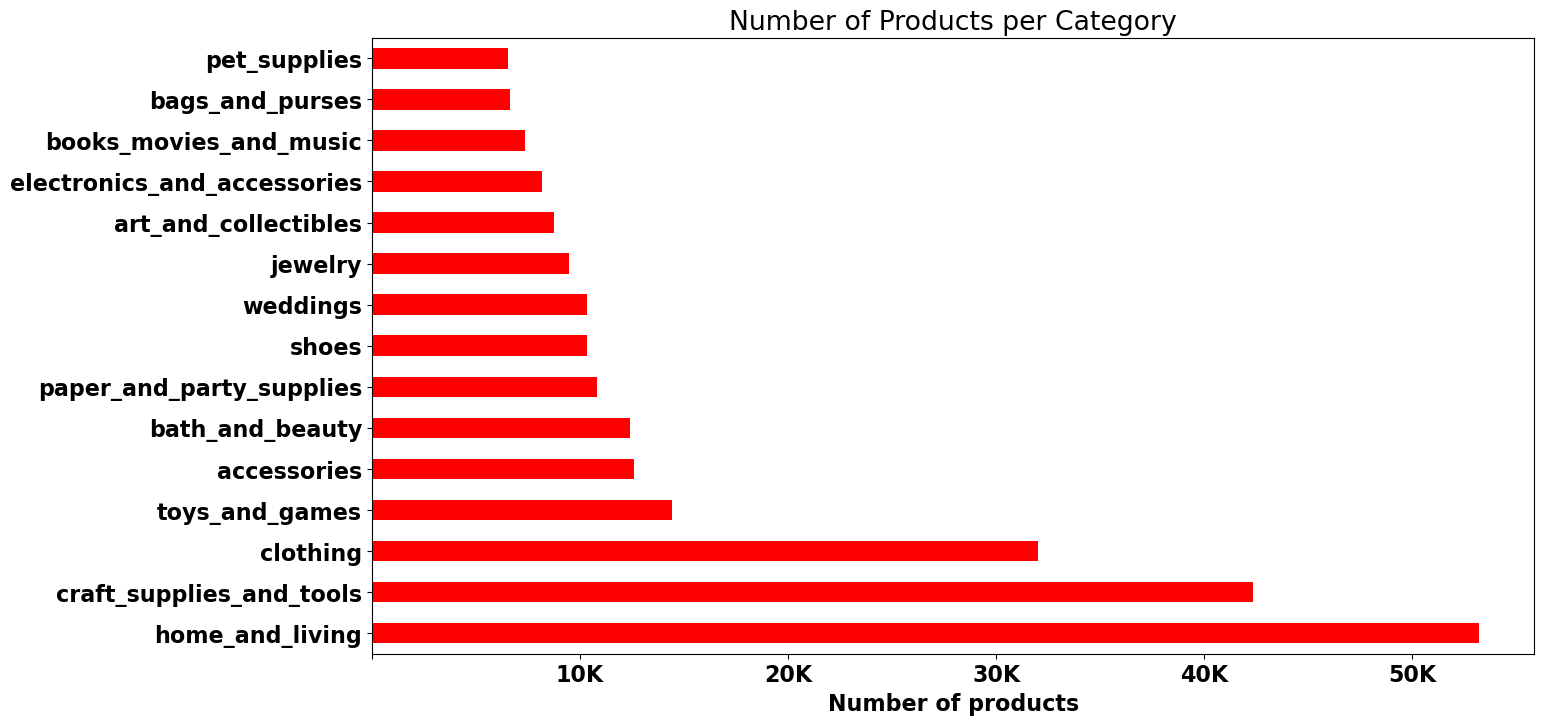

In [ ]:
figsize = (15, 8)
column = 'top_category_text'
x_limit = 60000
x_step = 10000
color = 'red'
    
figure, ax = plt.subplots(figsize=figsize)
pd.value_counts(
    df_train[column], 
    sort=True, ascending=False).plot.barh(color=color)
plt.title(f"Number of Products per Category")
xlabels = [f'{x // 1000:,}K' for x in range(0, x_limit, x_step)]
plt.xticks(range(0, x_limit, x_step), xlabels)
plt.xlabel('Number of products')
plt.setp(ax.get_xticklabels()[0], visible=False)
plt.show()

In [ ]:
df_test = get_parquet_data("test", len(parquet_filenames_test))

In [ ]:
f'Number of rows in test: {len(df_test):,}'

'Number of rows in test: 27,119'

In [ ]:
f"Number of unique products in test: {len(df_test['product_id'].unique()):,}"

'Number of unique products in test: 27,119'

In [ ]:
f"Number of columns in test: {len(df_test.columns):,}"

'Number of columns in test: 15'

In [ ]:
list(df_test.columns)

['product_id',
 'title',
 'description',
 'tags',
 'type',
 'room',
 'craft_type',
 'recipient',
 'material',
 'occasion',
 'holiday',
 'art_subject',
 'style',
 'shape',
 'pattern']

In [ ]:
df_test.iloc[0]

product_id                                            1323824090
title          12 Small Pressed Reddish-Orange Japanese Maple...
description    12 small pressed reddish-orange Japanese maple...
tags           Leaves,Art,Crafts,Paper crafts,Fall,Soap,Bookm...
type                                                    physical
room                                                        None
craft_type                                      floral arranging
recipient                                                   None
material                                                    None
occasion                                                    None
holiday                                                     None
art_subject                                                 None
style                                                       None
shape                                                       None
pattern                                                     None
Name: 0, dtype: object

In [ ]:
# Load the dataframe
df_train = pd.read_parquet(f"{PATH}/parquet/train")

# Calculate percentage of missing data for each column
missing_percentages = (df_train.isna().sum() / len(df_train)) * 100

print(missing_percentages)

product_id               0.000000
title                    0.382915
description              0.382915
tags                    14.220828
type                     0.518973
room                    96.444997
craft_type              86.752755
recipient               94.397621
material                91.496018
occasion                78.316801
holiday                 83.290629
art_subject             98.870399
style                   93.061898
shape                   99.039453
pattern                 95.650243
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64


# **Pre-processing Training Data**

---

Here, the data is pre-processed where some columns are removed, in some columns null values are replaced with empty strings and null values from some columns are replaced with values using mode.

In [ ]:
df_train.drop(['shape','room', 'recipient', 'holiday', 'art_subject'], axis=1, inplace=True)

In [ ]:
df_train['title'] = df_train['title'].fillna('')
df_train['description'] = df_train['description'].fillna('')
df_train['tags'] = df_train['tags'].fillna('')
df_train['type'] = df_train['type'].fillna('')

In [ ]:
# Replace null values in 'craft_type' column with mode
mode = df_train['craft_type'].mode()[0]
df_train['craft_type'].fillna(mode, inplace=True)

# Replace null values in 'material' column with mode
mode = df_train['material'].mode()[0]
df_train['material'].fillna(mode, inplace=True)

# Replace null values in 'occaison' column with mode
mode = df_train['occasion'].mode()[0]
df_train['occasion'].fillna(mode, inplace=True)

# Replace null values in 'style' column with mode
mode = df_train['style'].mode()[0]
df_train['style'].fillna(mode, inplace=True)

# Replace null values in 'pattern' column with mode
mode = df_train['pattern'].mode()[0]
df_train['pattern'].fillna(mode, inplace=True)

In [ ]:
missing_percentages = (df_train.isna().sum() / len(df_train)) * 100

print(missing_percentages)

product_id              0.0
title                   0.0
description             0.0
tags                    0.0
type                    0.0
craft_type              0.0
material                0.0
occasion                0.0
style                   0.0
pattern                 0.0
bottom_category_id      0.0
bottom_category_text    0.0
top_category_id         0.0
top_category_text       0.0
color_id                0.0
color_text              0.0
dtype: float64


In [ ]:
df_train['title'] = df_train['title'].str.lower()
df_train['description'] = df_train['description'].str.lower()
df_train['tags'] = df_train['tags'].str.lower()
df_train['type'] = df_train['type'].str.lower()
df_train['occasion'] = df_train['occasion'].str.lower()
df_train['bottom_category_text'] = df_train['bottom_category_text'].str.lower()
df_train['top_category_text'] = df_train['top_category_text'].str.lower()
df_train['color_text'] = df_train['color_text'].str.lower()

In [ ]:
df_train.head()

,product_id,title,description,tags,type,craft_type,material,occasion,style,pattern,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text
0,543497833,"full-face custom motorcycle helmet ,motorcycle...",helmetartthai from thailand ( since 2016) \n\n...,"predator helmet,motorcycle helmet,helmet,handm...",physical,kids' crafts,glass,birthday,modern,solid,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,12,purple
1,718680498,"full-face predator motorcycle helmet ,custom ...",helmetartthai from thailand ( since 2016) \n\n...,"predator helmet,custom helmet,handmade helme,p...",physical,kids' crafts,glass,birthday,modern,solid,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black
2,718823736,"full-face custom motorcycle helmet ,motorcycle...",helmetartthai from thailand ( since 2016) \n\n...,"predator helmet,custom helmet,handmade helmet,...",physical,kids' crafts,glass,birthday,modern,solid,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,2,blue
3,608840803,"full-face custom motorcycle helmet ,motorcycle...",helmetartthai from thailand ( since 2016) \n\n...,"predator helmet,custom helmet,handmade helmet,...",physical,kids' crafts,glass,birthday,modern,solid,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,4,brown
4,804070543,"full-face predator motorcycle helmet ,custom ...",helmetartthai from thailand ( since 2016) \n\n...,"custom helmet,handmade helmet,predator helmet,...",physical,kids' crafts,glass,birthday,modern,solid,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black


# **Model Training**

---

Here, the data is trained into train and tes set in 80:20 ratio.The multinomial Naive-Bayes model is trained. Some methodologies such as CountVectorizer, TF-IDF Transformer and Multi-Output Classifier.

In [ ]:
# Split the dataframe into training and testing sets
df_train, df_test = train_test_split(df_train, test_size=0.2, random_state=42)

In [ ]:
f"Number of products for training: {len(df_train):,}"

'Number of products for training: 196,388'

In [ ]:
f"Number of products for validation: {len(df_test):,}"

'Number of products for validation: 49,097'

In [ ]:
df_train['bottom_category_text'].value_counts()

weddings.decorations.serving_and_dining.wedding_forks                                        87
craft_supplies_and_tools.pens_pencils_and_marking_tools.nibs_and_nib_holders                 85
home_and_living.bathroom.bath_towels.hooded_towels                                           85
electronics_and_accessories.electronics_cases.camera_bags_and_cases                          85
shoes.womens_shoes.sandals.flip_flops_and_thongs                                             84
                                                                                             ..
craft_supplies_and_tools.safety_and_cleaning_supplies.safety_supplies.glasses_and_goggles    33
shoes.mens_shoes.sneakers_and_athletic_shoes.platform_and_club_sneakers                      33
clothing.girls_clothing.sweaters.sweater_vests                                               31
toys_and_games.sports_and_outdoor_games.boating_and_water_sports                             31
craft_supplies_and_tools.glue_and_adhesi

In [ ]:
df_test['bottom_category_text'].value_counts()

craft_supplies_and_tools.fabric_and_notions.notions.pins_and_needles.pins.head_pins                            31
clothing.gender_neutral_kids_clothing.costumes                                                                 30
books_movies_and_music.music.music_cases_and_sleeves                                                           29
craft_supplies_and_tools.fabric_and_notions.notions.pins_and_needles.pin_and_needle_accessories.pincushions    29
craft_supplies_and_tools.storage_and_organization.containers.tubes                                             29
                                                                                                               ..
clothing.girls_clothing.underwear.petticoats                                                                    6
clothing.womens_clothing.swimwear.swim_caps                                                                     6
weddings.decorations.serving_and_dining.wedding_forks                                   

In [ ]:
df_train['top_category_text'].value_counts()

home_and_living                42466
craft_supplies_and_tools       33940
clothing                       25663
toys_and_games                 11545
accessories                    10122
bath_and_beauty                10025
paper_and_party_supplies        8632
shoes                           8273
weddings                        8249
jewelry                         7576
art_and_collectibles            6983
electronics_and_accessories     6512
books_movies_and_music          5913
bags_and_purses                 5246
pet_supplies                    5243
Name: top_category_text, dtype: int64

In [ ]:
df_test['top_category_text'].value_counts()

home_and_living                10734
craft_supplies_and_tools        8408
clothing                        6365
toys_and_games                  2882
accessories                     2488
bath_and_beauty                 2401
paper_and_party_supplies        2179
weddings                        2084
shoes                           2082
jewelry                         1881
art_and_collectibles            1758
electronics_and_accessories     1665
books_movies_and_music          1465
bags_and_purses                 1399
pet_supplies                    1306
Name: top_category_text, dtype: int64

In [ ]:
df_train['color_text'].value_counts()

black        26025
white        24901
blue         21440
brown        18360
green        12544
pink         12384
red          12216
silver       11945
beige        10135
gold          8553
other         7966
yellow        5934
purple        5349
clear         5076
orange        4250
rainbow       4208
bronze        2363
copper        1806
rose gold      933
Name: color_text, dtype: int64

In [ ]:
df_test['color_text'].value_counts()

black        6512
white        6293
blue         5532
brown        4531
green        3131
pink         3115
red          3027
silver       2947
beige        2529
gold         2175
other        1954
yellow       1472
purple       1290
clear        1261
orange       1096
rainbow      1018
bronze        559
copper        431
rose gold     223
grey            1
Name: color_text, dtype: int64

In [ ]:
# Define the features and target variables for training and testing datasets
train_features = df_train[['title', 'description', 'tags', 'type', 'craft_type', 'material', 'style', 'pattern', 'occasion']].fillna('').apply(lambda x: ' '.join(x), axis=1).values
train_labels = df_train[['top_category_id', 'bottom_category_id', 'color_id']].values

test_features = df_test[['title', 'description', 'tags', 'type', 'craft_type', 'material', 'style', 'pattern', 'occasion']].fillna('').apply(lambda x: ' '.join(x), axis=1).values
test_labels = df_test[['top_category_id', 'bottom_category_id', 'color_id']].values


In [ ]:
# Define the pipeline for multi-output classification
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(MultinomialNB())),
])

In [ ]:
# Train the model for all three target variables
text_clf.fit(train_features, train_labels)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultiOutputClassifier(estimator=MultinomialNB()))])

In [ ]:
# Make predictions on the test data
predicted_labels = text_clf.predict(test_features)

# **Evaluation**

---

Here, the trained model is evaluated by generating the F1 score. The macro-averaged F1 score and application report is generated.

In [ ]:
f1_scores = []
for i, label_name in enumerate(['top_category_id', 'bottom_category_id', 'color_id']):
    # Compute F1-score
    f1 = f1_score(test_labels[:, i], predicted_labels[:, i], average='micro')
    f1_scores.append(f1)
    print(f"F1 score for {label_name}: {f1:.3f}")
    
    # Print classification report
    print(f"\nClassification report for {label_name}:")
    print(classification_report(test_labels[:, i], predicted_labels[:, i]))


F1 score for top_category_id: 0.544

Classification report for top_category_id:
              precision    recall  f1-score   support

           0       0.90      0.14      0.24      2488
           1       1.00      0.00      0.00      1758
           2       0.95      0.01      0.03      1399
           3       0.96      0.29      0.45      2401
           4       0.99      0.08      0.14      1465
           5       0.71      0.97      0.82      6365
           6       0.54      0.79      0.64      8408
           7       0.99      0.18      0.30      1665
           8       0.43      0.98      0.60     10734
           9       0.96      0.12      0.21      1881
          10       0.76      0.13      0.23      2179
          11       1.00      0.02      0.05      1306
          12       0.96      0.44      0.60      2082
          13       0.90      0.13      0.22      2882
          14       0.88      0.03      0.07      2084

    accuracy                           0.54     49097


/Users/virus/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/virus/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/virus/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/virus/anaconda3/lib/p

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       1.00      0.24      0.38        21
           3       0.38      0.92      0.53        13
           4       0.60      0.26      0.36        23
           5       0.85      0.50      0.63        22
           6       0.00      0.00      0.00        14
           7       0.36      0.62      0.46        13
           8       0.62      0.88      0.73        17
           9       0.50      0.04      0.08        24
          10       0.90      0.36      0.51        25
          11       1.00      0.87      0.93        15
          12       1.00      0.47      0.64        17
          13       0.50      0.73      0.59        15
          14       0.68      1.00      0.81        15
          15       0.58      1.00      0.74        14
          16       0.29      0.41      0.34        17
          17       0.80      0.27      0.40        15
          18       0.53    

/Users/virus/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/virus/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Compute the overall macro-averaged F1 score
macro_f1 = sum(f1_scores) / len(f1_scores)
print(f"Macro-averaged F1 score: {macro_f1:.3f}")

Macro-averaged F1 score: 0.444


# **Model is saved on a local system**

In [ ]:
# Save the trained model to a file
dump(text_clf, '/Users/virus/Desktop/data/multinomialNB.joblib')

['/Users/virus/Desktop/data/multinomialNB.joblib']

In [ ]:
# Load the saved model from a file
text_clf = load('/Users/virus/Desktop/data/multinomialNB.joblib')

# **Pre-processing the Test Data**

---
Same operations are performed on Test data which were performed on the Train data.


In [ ]:
# Load the dataframe
df_test = pd.read_parquet(f"{PATH}/parquet/test")

# Calculate percentage of missing data for each column
missing_percentages = (df_test.isna().sum() / len(df_test)) * 100

print(missing_percentages)

product_id      0.000000
title           0.409307
description     0.409307
tags           14.333124
type            0.530993
room           96.467421
craft_type     86.703050
recipient      94.549947
material       91.367676
occasion       78.738154
holiday        83.236845
art_subject    98.974888
style          93.074966
shape          98.886390
pattern        95.685682
dtype: float64


In [ ]:
df_test.drop(['shape','room', 'recipient', 'holiday', 'art_subject'], axis=1, inplace=True)

In [ ]:
df_test['title'] = df_test['title'].fillna('')
df_test['description'] = df_test['description'].fillna('')
df_test['tags'] = df_test['tags'].fillna('')
df_test['type'] = df_test['type'].fillna('')

In [ ]:
# Replace null values in 'craft_type' column with mode
mode = df_test['craft_type'].mode()[0]
df_test['craft_type'].fillna(mode, inplace=True)

# Replace null values in 'material' column with mode
mode = df_test['material'].mode()[0]
df_test['material'].fillna(mode, inplace=True)

# Replace null values in 'occaison' column with mode
mode = df_test['occasion'].mode()[0]
df_test['occasion'].fillna(mode, inplace=True)

# Replace null values in 'style' column with mode
mode = df_test['style'].mode()[0]
df_test['style'].fillna(mode, inplace=True)

# Replace null values in 'pattern' column with mode
mode = df_test['pattern'].mode()[0]
df_test['pattern'].fillna(mode, inplace=True)

In [ ]:
missing_percentages = (df_test.isna().sum() / len(df_test)) * 100

print(missing_percentages)

product_id     0.0
title          0.0
description    0.0
tags           0.0
type           0.0
craft_type     0.0
material       0.0
occasion       0.0
style          0.0
pattern        0.0
dtype: float64


In [ ]:
df_test['title'] = df_test['title'].str.lower()
df_test['description'] = df_test['description'].str.lower()
df_test['tags'] = df_test['tags'].str.lower()
df_test['type'] = df_test['type'].str.lower()
df_test['occasion'] = df_test['occasion'].str.lower()

In [ ]:
df_test.head()

,product_id,title,description,tags,type,craft_type,material,occasion,style,pattern
0,1323824090,12 small pressed reddish-orange japanese maple...,12 small pressed reddish-orange japanese maple...,"leaves,art,crafts,paper crafts,fall,soap,bookm...",physical,floral arranging,glass,birthday,modern,solid
1,544175230,"christmas artificial leaves, holiday decor, gl...",glitter fake leaves.\nprice for 5 leaves \nlea...,"holiday decor,glitter fake leaves,faux greener...",physical,floral arranging,glass,birthday,modern,solid
2,895779370,fresh holly leaves ( 50 count) - christmas gre...,this listing includes 50 fresh holly leaves fr...,"lucky holly leaves,christmas greenery,christma...",physical,floral arranging,glass,birthday,modern,solid
3,641102090,"christmas artificial greenery, gold plants, gl...",glitter pine stems.\nprice for 1 branch\nthe t...,"glitter pine stems,holiday decor,christmas cra...",physical,floral arranging,glass,birthday,modern,solid
4,1340603160,red crown of thorn corona thai hybrid sale cut...,free shipping,"cactus live plant,crown of thorns",physical,kids' crafts,glass,birthday,modern,solid


# **Submission**


In [ ]:
# Define the features for the test data
test_features = df_test[['title', 'description', 'tags', 'type', 'craft_type', 'material', 'style', 'pattern', 'occasion']].fillna('').apply(lambda x: ' '.join(x), axis=1).values

In [ ]:
# Make predictions on the test data
predicted_labels = text_clf.predict(test_features)

In [ ]:
# Create a new DataFrame to store the predictions
df_predictions = df_test[['product_id', 'title', 'description', 'tags', 'type', 'craft_type', 'material', 'style', 'pattern', 'occasion']].copy()

In [ ]:
# Add the predicted labels to the DataFrame
df_predictions[['top_category_id', 'bottom_category_id', 'color_id']] = predicted_labels

In [ ]:
# Save the predictions to a Parquet file
student_id = "22263276"
df_predictions.to_parquet(f"{student_id}.parquet")